In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style

In [3]:
data=pd.read_csv('compilationErrorsSF110.csv')

data.head()

MODEL   SCENARIO  TOKEN  PROJECT  \
0  Codex  scenario1   4000  apbsmem   
1  Codex  scenario1   4000  apbsmem   
2  Codex  scenario1   4000  apbsmem   
3  Codex  scenario1   4000  apbsmem   
4  Codex  scenario1   4000  apbsmem   

                                                PATH  LOCATION  \
0  /Users/lsiddiqsunny/Documents/Notre_Dame/Resea...       NaN   
1  /Users/lsiddiqsunny/Documents/Notre_Dame/Resea...       NaN   
2  /Users/lsiddiqsunny/Documents/Notre_Dame/Resea...       NaN   
3  /Users/lsiddiqsunny/Documents/Notre_Dame/Resea...       NaN   
4  /Users/lsiddiqsunny/Documents/Notre_Dame/Resea...       NaN   

                                               ERROR  
0  error: no suitable constructor found for PlotD...  
1  error: no suitable constructor found for PlotD...  
2  error: no suitable constructor found for PlotD...  
3  error: no suitable constructor found for PlotD...  
4  error: no suitable constructor found for PlotD...

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['ERROR']) #ERROR AFTER EXECUTING THESE #LINES
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(131552, 51538)


In [ ]:
range_n_clusters = [x for x in range(2,50)]
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(tfidf)

    silhouette_avg = silhouette_score(tfidf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)



style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()


In [5]:
num_clusters = 49 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit_predict(tfidf)
clusters = km.labels_.tolist()

data["Cluster"] = clusters

data.to_csv("clusters.csv", index=False) 

In [6]:
print(data['Cluster'].value_counts()) #Print the counts of doc belonging `#to each cluster.`


37    53482
20    21710
40     5808
12     4653
36     2723
46     2617
30     2553
8      2424
47     2190
38     2178
21     2140
27     2118
41     1782
11     1661
14     1597
28     1577
4      1402
44     1339
16     1183
31     1120
33     1115
42     1015
5       956
10      800
17      792
13      737
35      722
48      722
39      717
15      665
25      653
18      586
0       532
34      518
32      461
24      453
6       437
19      433
43      392
3       391
7       347
22      337
29      325
26      282
9       280
45      267
23      158
2       119
1        83
Name: Cluster, dtype: int64


In [7]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt



Cluster 0 words:

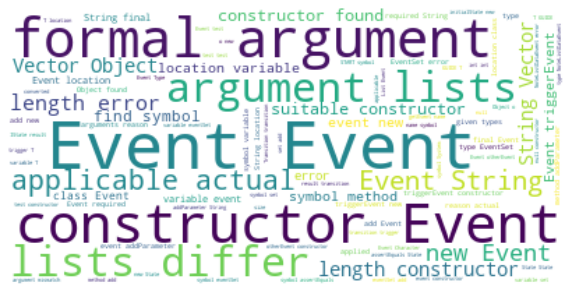



Cluster 1 words:

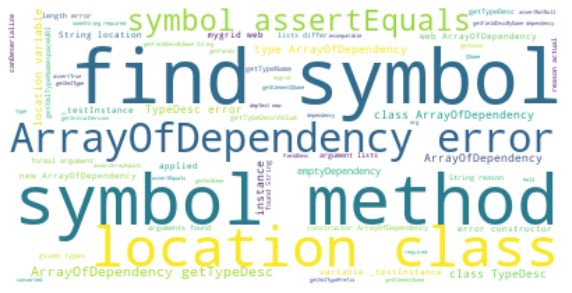



Cluster 2 words:

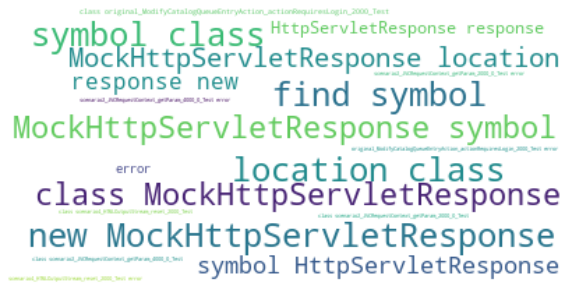



Cluster 3 words:

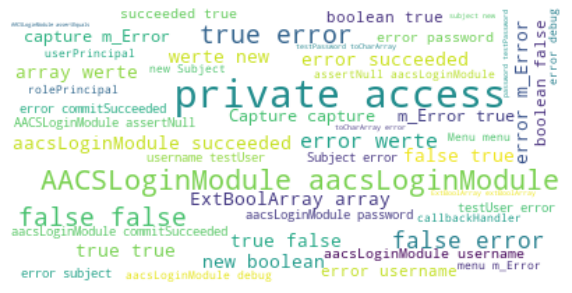



Cluster 4 words:

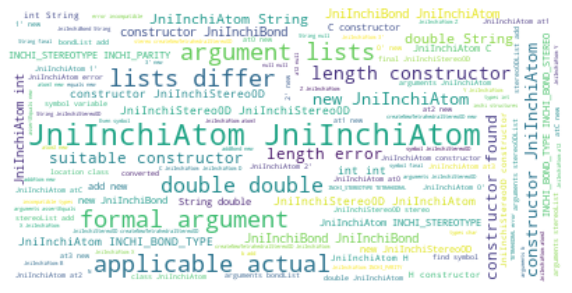



Cluster 5 words:

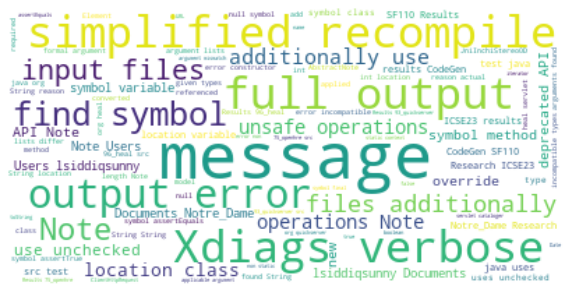



Cluster 6 words:

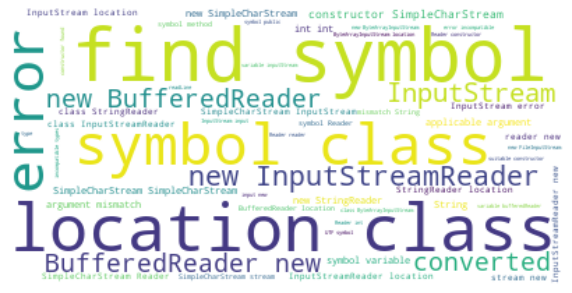



Cluster 7 words:

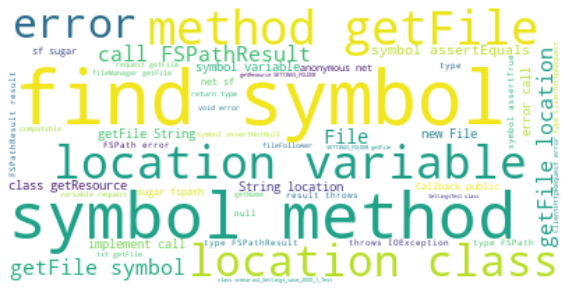



Cluster 8 words:

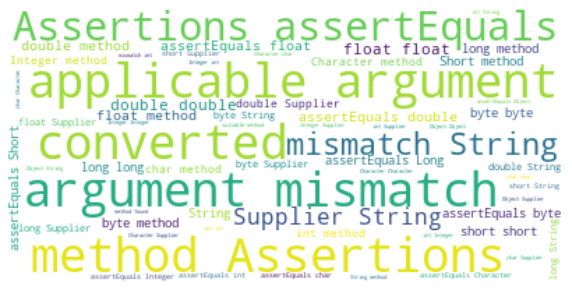



Cluster 9 words:

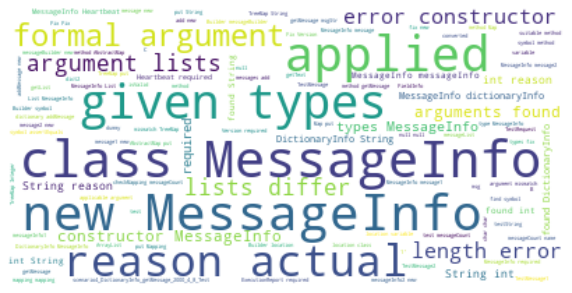



Cluster 10 words:

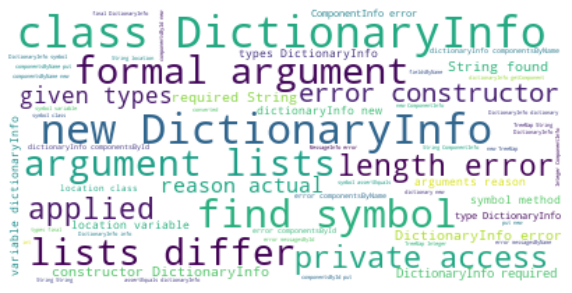



Cluster 11 words:

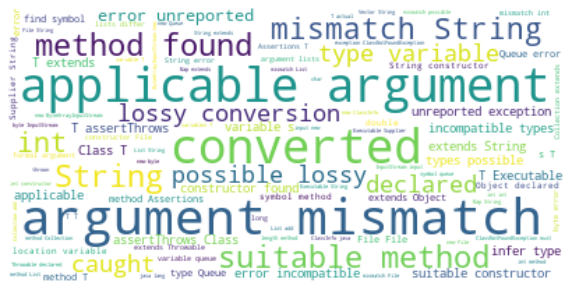



Cluster 12 words:

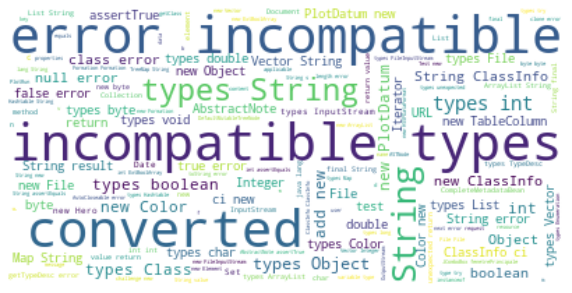



Cluster 13 words:

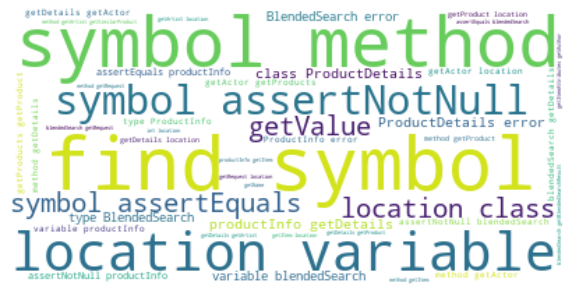



Cluster 14 words:

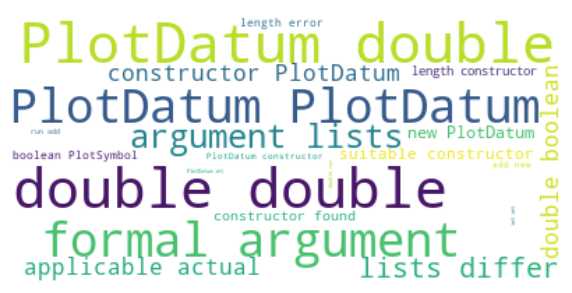



Cluster 15 words:

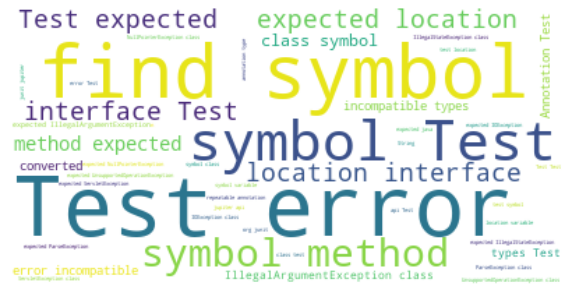



Cluster 16 words:

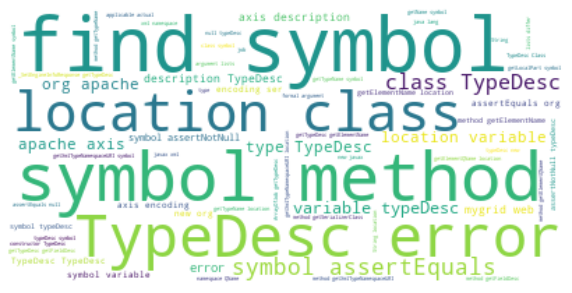



Cluster 17 words:

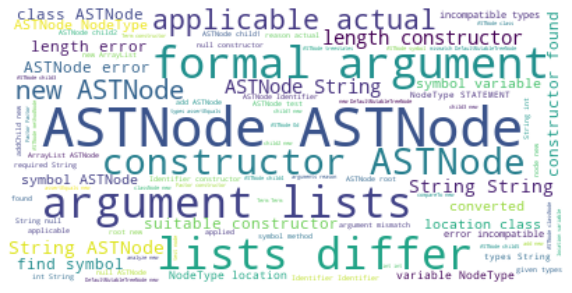



Cluster 18 words:

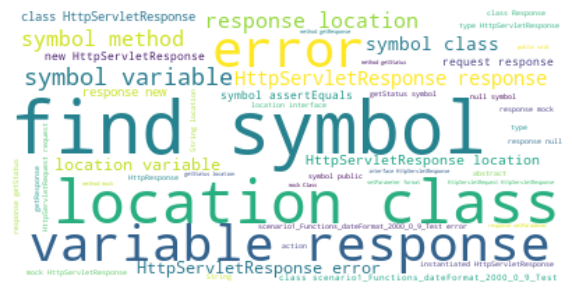



Cluster 19 words:

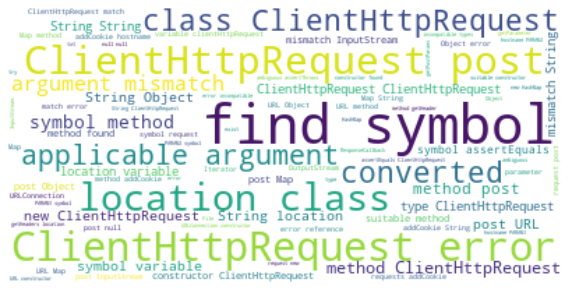



Cluster 20 words:

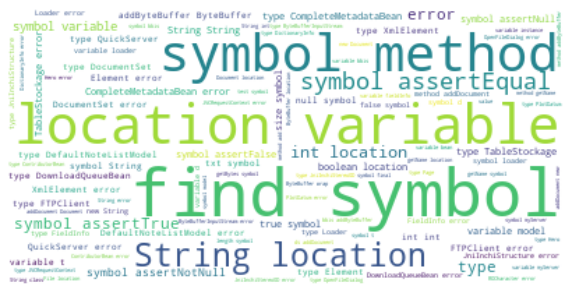



Cluster 21 words:

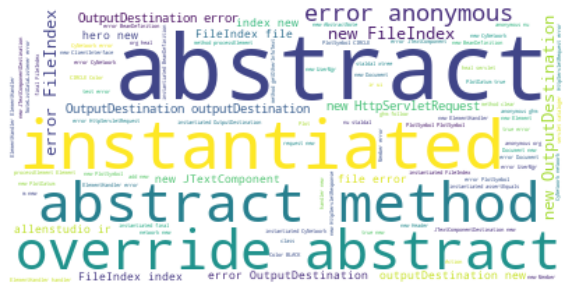



Cluster 22 words:

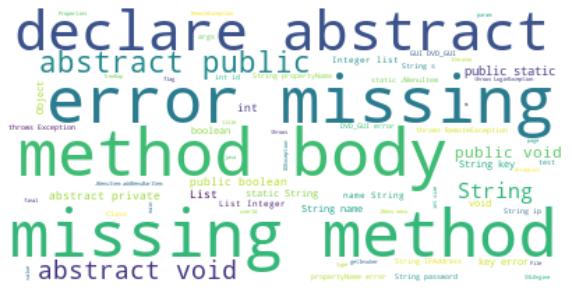



Cluster 23 words:

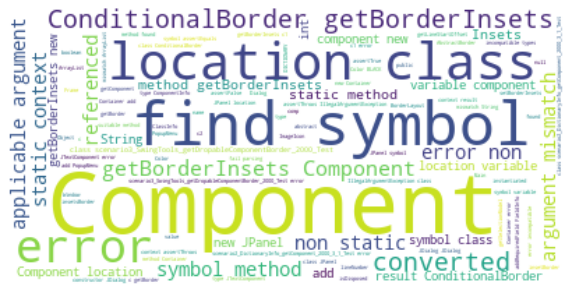



Cluster 24 words:

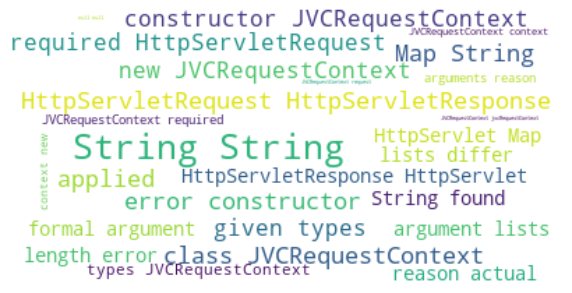



Cluster 25 words:

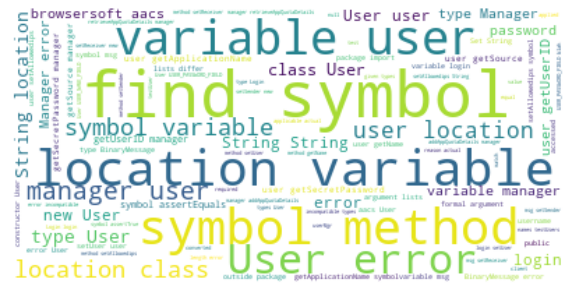



Cluster 26 words:

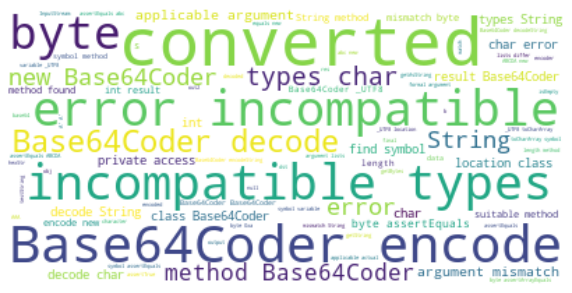



Cluster 27 words:

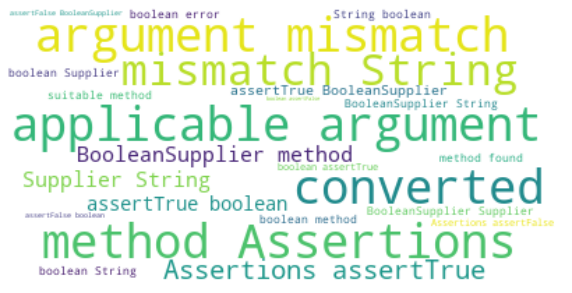



Cluster 28 words:

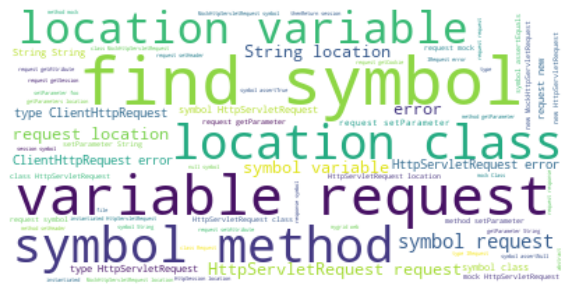



Cluster 29 words:

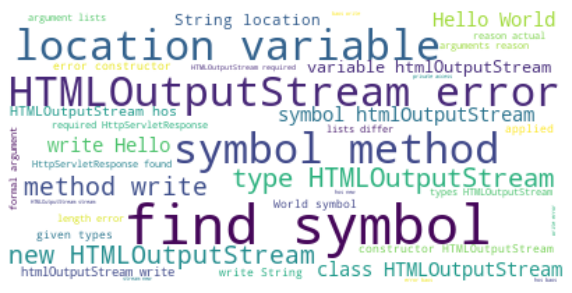



Cluster 30 words:

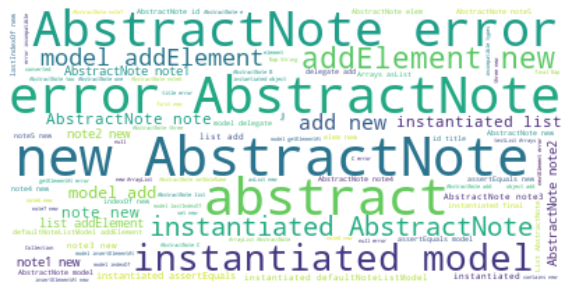



Cluster 31 words:

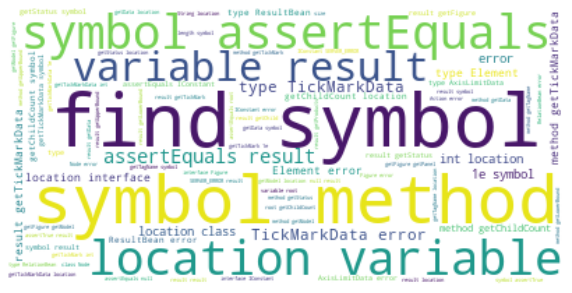



Cluster 32 words:

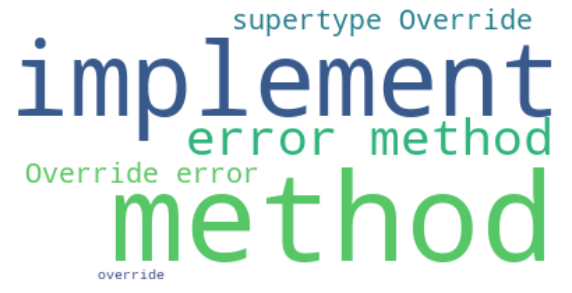



Cluster 33 words:

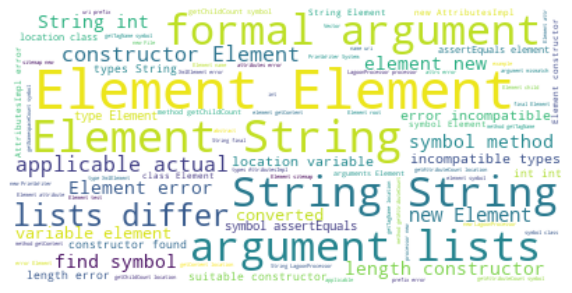



Cluster 34 words:

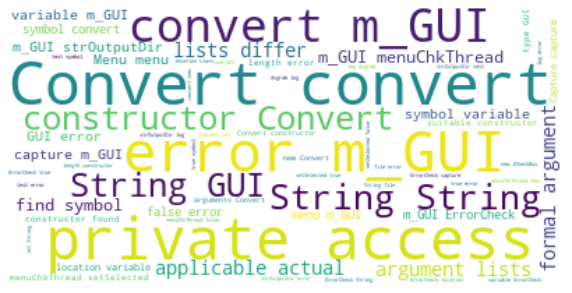



Cluster 35 words:

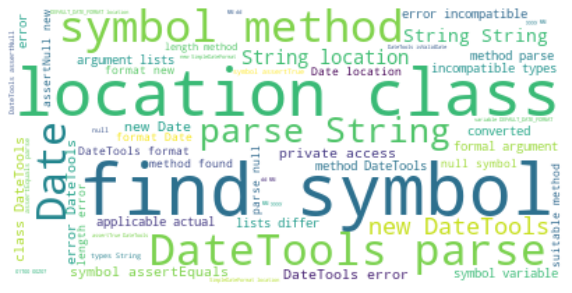



Cluster 36 words:

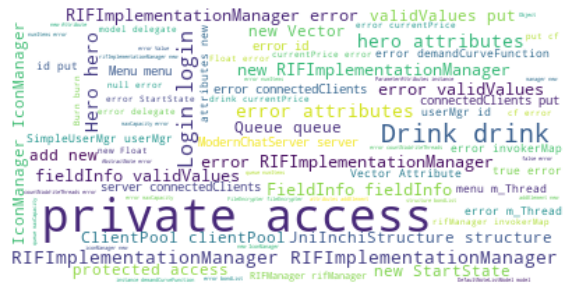



Cluster 37 words:

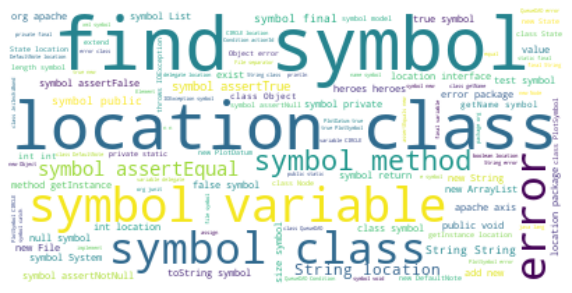



Cluster 38 words:

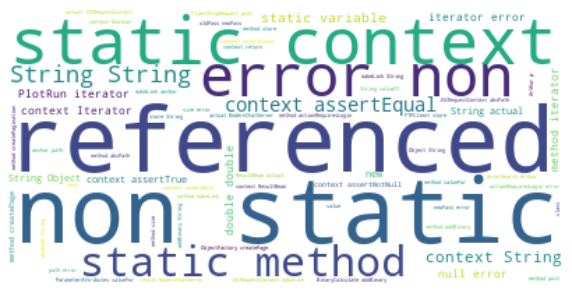



Cluster 39 words:

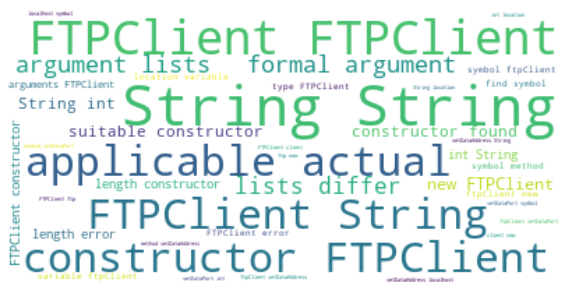



Cluster 40 words:

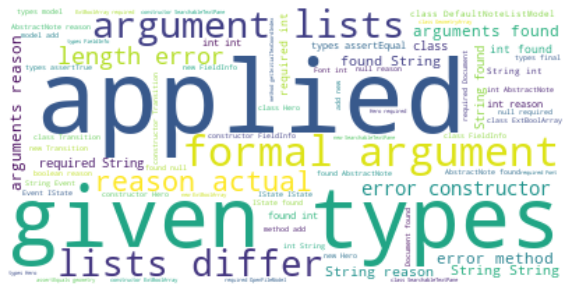



Cluster 41 words:

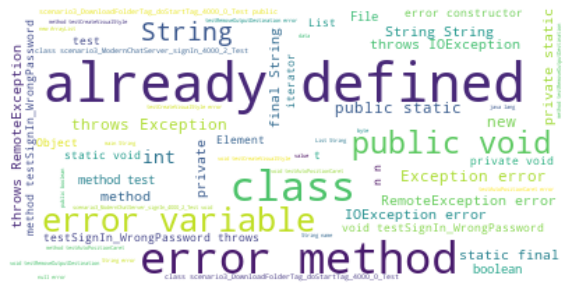



Cluster 42 words:

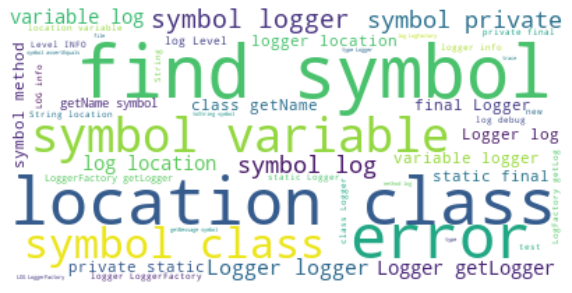



Cluster 43 words:

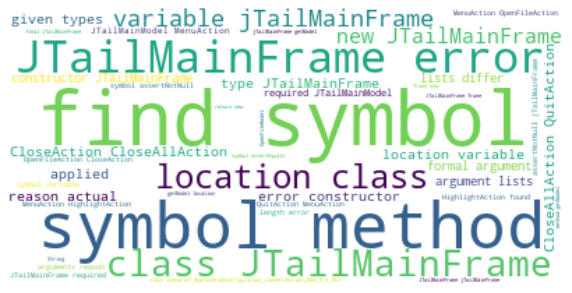



Cluster 44 words:

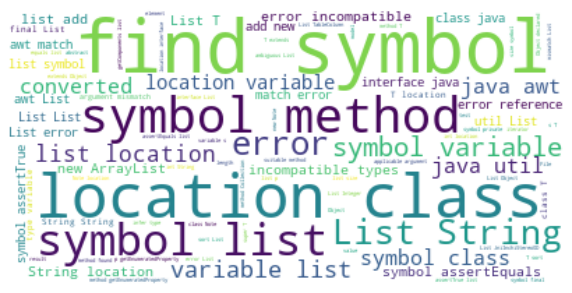



Cluster 45 words:

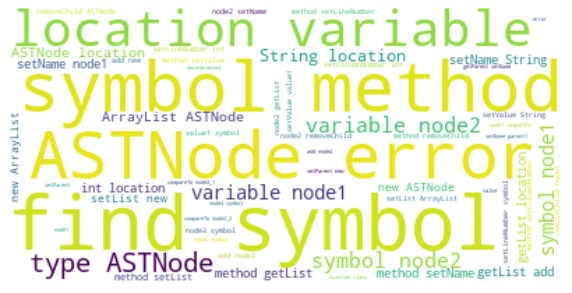



Cluster 46 words:

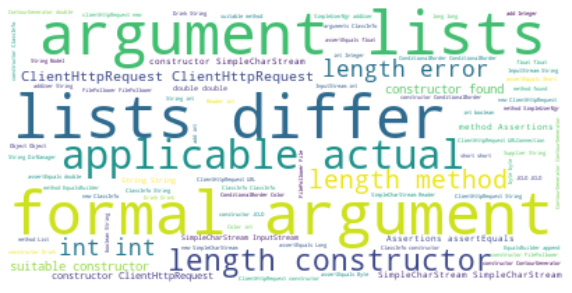



Cluster 47 words:

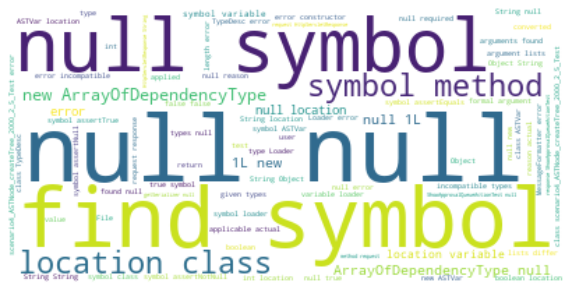



Cluster 48 words:

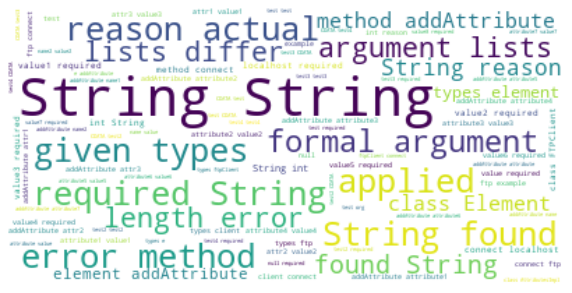

In [9]:
for x in range(0,num_clusters):
    print("\n")
    print("Cluster %d words:" % x, end='')
    
    words = ''
    for i in data[data['Cluster'] == x]['ERROR'].values:
        words = words + ' '.join(i.split()) + ' '
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [8]:
x = [0.017704850038841067, 0.01992161197991317, 0.01955010466498124, 0.022538180027137422, 0.02566264194421503, 0.02879376364156173, 0.03049444597313119, 0.03255872291219714, 0.0342318585715614, 0.032973158763945104, 0.03698338908050543, 0.03417621506303553, 0.03535497132020165, 0.04022726817127417, 0.03010997464900111, 0.03657384949120008, 0.040004910542358434, 0.04117714080414533, 0.04281310395722796, 0.03997774258256571, 0.04594573413001559, 0.0412221731103347, 0.041855785084716775, 0.04553776042040133, 0.045006463302521345, 0.04451685239976632, 0.05288474848259429, 0.04206275855410157, 0.04690951317805379, 0.05239966021067413, 0.051909881013086266, 0.052667078802584186, 0.05213225321668564, 0.04297792386713577, 0.04410666497738686, 0.05145751251571699, 0.05100245837159291, 0.05250659222493132, 0.0529362220532025, 0.05712392426136983, 0.054981845821043866, 0.059412214900007525, 0.05305871289428097, 0.055482465575584165, 0.05696550691309296, 0.05161602222348573, 0.052432953212166095, 0.062195676663681074]

In [9]:
y = [i for i in range(2,50)]

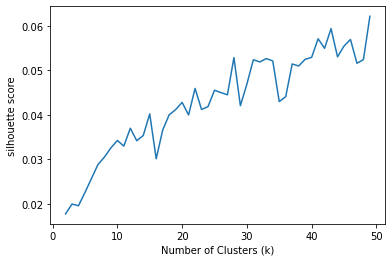

In [11]:
plt.plot(y, x)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()